In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("/content/breastcancer.csv")

In [93]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [94]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [95]:
df.drop(["perimeter_mean","area_mean","concave points_mean","radius_worst","perimeter_worst","area_worst"], axis=1, inplace=True)

In [96]:
df.corr()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,-0.012968,0.000096,0.050080,-0.022114,-0.052511,0.143048,-0.007526,...,-0.017306,0.025725,0.064720,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,...,-0.104321,-0.042641,0.297008,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,...,0.009127,0.054458,0.912045,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,...,0.200774,0.283607,0.036072,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,...,0.229977,0.507318,0.248133,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,...,0.178009,0.449301,0.299879,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,...,0.449137,0.331786,0.090651,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN
fractal_dimension_mean,-0.052511,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,...,0.345007,0.688132,-0.051269,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,NaN
radius_se,0.143048,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,...,0.240567,0.227754,0.194799,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559,NaN
texture_se,-0.007526,-0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,...,0.411621,0.279723,0.409003,-0.073658,-0.092439,-0.068956,-0.119638,-0.128215,-0.045655,NaN


In [97]:
 df.drop(["texture_worst","smoothness_worst","concavity_mean","compactness_worst","concavity_worst","concave points_worst","fractal_dimension_worst"], axis=1, inplace=True)

In [98]:
df.corr()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,-0.044224,NaN
radius_mean,0.074626,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.163953,NaN
texture_mean,0.099770,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.105008,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.394309,NaN
compactness_mean,0.000096,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.510223,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.699826,NaN
fractal_dimension_mean,-0.052511,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.334019,NaN
radius_se,0.143048,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.094543,NaN
texture_se,-0.007526,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.128215,NaN
perimeter_se,0.137331,0.674172,0.281673,0.296092,0.548905,0.313893,0.039830,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.109930,NaN


In [99]:
 df.drop(["fractal_dimension_se","concave points_se","concavity_se","area_se","perimeter_se"], axis=1, inplace=True)

In [100]:
df.corr()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.096781,0.033961,-0.017306,-0.044224,NaN
radius_mean,0.074626,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,-0.104321,0.163953,NaN
texture_mean,0.099770,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.009127,0.105008,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.200774,0.394309,NaN
compactness_mean,0.000096,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.229977,0.510223,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.449137,0.699826,NaN
fractal_dimension_mean,-0.052511,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.345007,0.334019,NaN
radius_se,0.143048,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.240567,0.094543,NaN
texture_se,-0.007526,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.411621,-0.128215,NaN
smoothness_se,0.096781,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.413506,-0.107342,NaN


In [101]:
 df.drop(["Unnamed: 32"], axis=1, inplace=True)

In [102]:
df.corr()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
id,1.000000,0.074626,0.099770,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.096781,0.033961,-0.017306,-0.044224
radius_mean,0.074626,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,-0.104321,0.163953
texture_mean,0.099770,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.009127,0.105008
smoothness_mean,-0.012968,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.200774,0.394309
compactness_mean,0.000096,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.229977,0.510223
symmetry_mean,-0.022114,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.449137,0.699826
fractal_dimension_mean,-0.052511,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.345007,0.334019
radius_se,0.143048,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.240567,0.094543
texture_se,-0.007526,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.411621,-0.128215
smoothness_se,0.096781,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.413506,-0.107342


In [103]:
 df.drop(["id"], axis=1, inplace=True)

In [104]:
 df.drop(["diagnosis"], axis=1, inplace=True)

In [105]:
df.shape

(569, 12)

In [106]:
df

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.4087


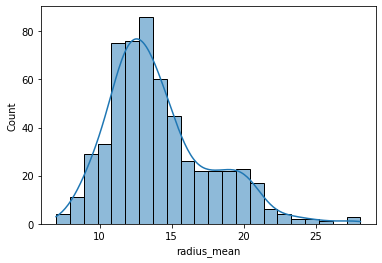

radius_mean do not follow a normal distribution (p-value: 1.286172249506454e-16)


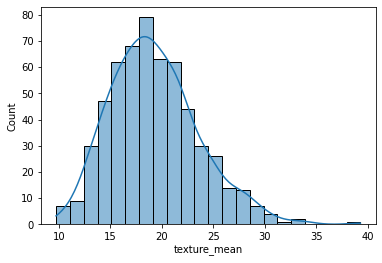

texture_mean do not follow a normal distribution (p-value: 4.685882796961145e-10)


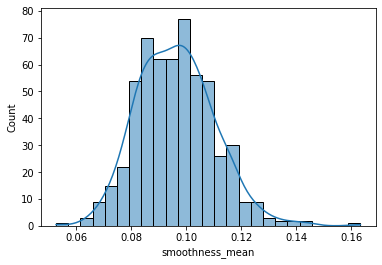

smoothness_mean do not follow a normal distribution (p-value: 6.925619033400491e-07)


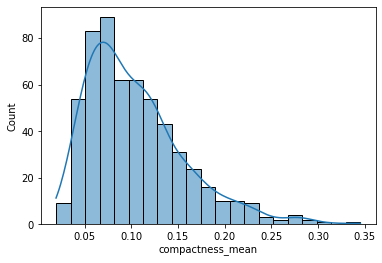

compactness_mean do not follow a normal distribution (p-value: 2.7333433490329536e-25)


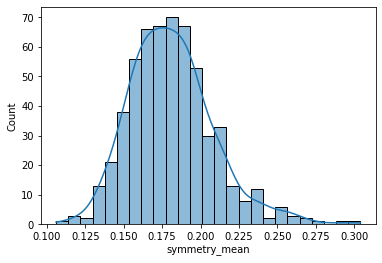

symmetry_mean do not follow a normal distribution (p-value: 1.5898397363101805e-13)


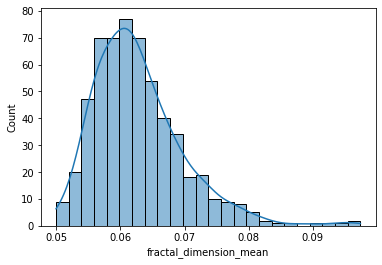

fractal_dimension_mean do not follow a normal distribution (p-value: 1.4280298636963606e-32)


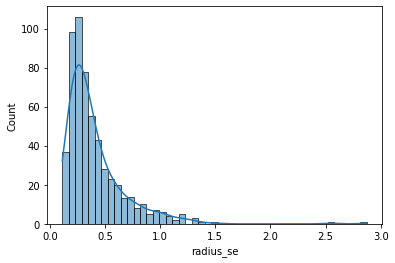

radius_se do not follow a normal distribution (p-value: 1.6997795475055263e-92)


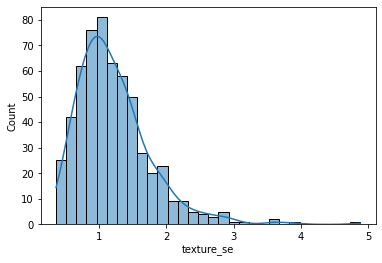

texture_se do not follow a normal distribution (p-value: 1.1899112222853113e-46)


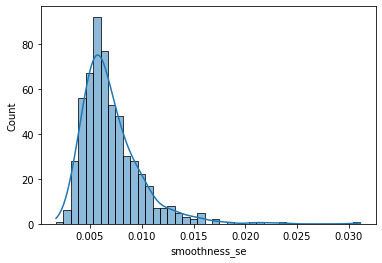

smoothness_se do not follow a normal distribution (p-value: 5.737713465501459e-70)


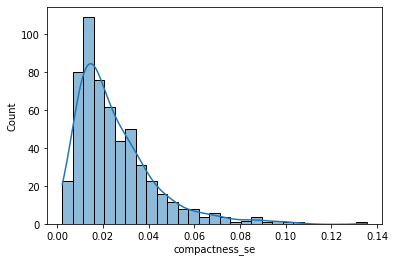

compactness_se do not follow a normal distribution (p-value: 8.110584649898849e-52)


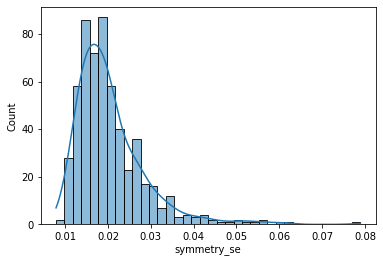

symmetry_se do not follow a normal distribution (p-value: 1.2192258903277784e-63)


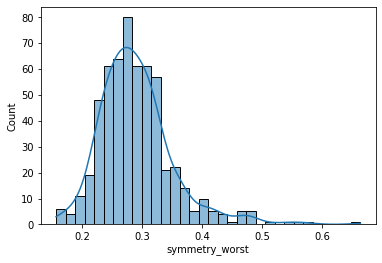

symmetry_worst do not follow a normal distribution (p-value: 1.286912411671778e-39)


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
columns = df.columns.tolist()

for i in range(len(columns)):
        
        sns.histplot(data =df, x = df[columns[i]], kde=True)
        plt.xlabel(columns[i])
        plt.show()

        p_value = stats.normaltest(df[columns[i]]).pvalue
        if p_value > 0.1:
              print(f"{columns[i]}  follow a normal distribution (p-value: {p_value})")
        else:
              print(f"{columns[i]} do not follow a normal distribution (p-value: {p_value})")


In [118]:
def calculate_prior(df,Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
    prior = append(len(df[df[Y]==i]/len(df)))

In [122]:
def cal_likelihood_gaussian(df,feat_name,feat_value,Y,label):
  feat = list(df.columns)
  df = df[final[Y] == label]
  mean,std = df[feat_name].mean(), df[feat_name].std()
  P_x_given_y = (1/np.sqrt(2*np.pi)*std)*np.exp(-((feat_value.mean())**2/2*std))
  return P_x_given_y
cal_likelihood_gaussian(df,'smoothness_mean',df.at[1,'smoothness_mean'],'diagnosis','M')

SyntaxError: ignored

In [116]:
from math import sqrt
from math import pi
from math import exp

In [115]:
def separate_by_class(dataset):
  separated = dict()
  for i in range(len(dataset)):
    vector = dataset[i]
    class_value = vector[-1]
    if (class_value not in separated):
      separated[class_value] = list()
    separated[class_value.append(vector)]
  return separated

In [114]:
def mean(numbers):
  return sum(numbers)/float(len(numbers))

In [113]:
def stdev(numbers):
  avg = mean(numbers)
  variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
  return sqrt(variance)

In [112]:
def summarize_dataset(dataset):
  summaries = [(mean(column), stdev(solumn), len(column)) for column in zip(*dataset)]
  del(summaries[-1])
  return summaries

In [111]:
def summarize_by_class(dataset):
  seperated = seperate_by_class(dataset)
  summaries = dict()
  for class_value, rows in seperated.items():
    summaries[class_value] = summarize_dataset(rows)
  return summaries

In [110]:
def calculate_probability(x,mean,stdev):
  exponent=exp(-((x-mean)**2/(2*stdev**2)))
  return(1/(sqrt(2*pi)*stdev))*exponent

In [90]:
def calculate_class_probabilities(summaries,row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, _ = class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities